<a href="https://colab.research.google.com/github/deepanshulamba/Hate-Speech-Detection-on-Twitter/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student_ID : 2211688

# Common Codes

In [ ]:
!echo "drive.mount('/content/drive', force_remount=True)" > /content/startup.py       # mounting the drive permanently

## Mounting google drive in the colab.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## Importing required libraries.

In [ ]:
!pip install transformers     # installing the transformers library.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 22.4 MB/s eta 0:00:00


In [ ]:
!pip install emoji     # installing the emoji library.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=8e7d64abbbbbb3802d769eddee30b534d4a30fe11d441635bad01e00f58f58a5
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [ ]:
import os
import pandas as pd
import numpy as np
import nltk
import joblib
import re
import string
import emoji
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC, NuSVC, LinearSVC, SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stopword = stopwords.words('english')
mylemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
Student_ID = 2211688    #Student ID.
np.random.seed(Student_ID)

## My Google drive path.

In [ ]:
MyGDrivePath = os.path.join('./CE807/Assignment2/', str(Student_ID))
GDrivePath = os.path.join('gdrive', 'MyDrive', MyGDrivePath)
print(os.listdir(GDrivePath))

['code.ipynb', 'test.csv', 'valid.csv', 'train.csv', 'models', 'train25.csv', 'train50.csv', 'train75.csv', 'train100.csv']


### Files in my GDrive Assignment Folder.

In [ ]:
trainfile = os.path.join(GDrivePath, 'train.csv')
train_25_file = os.path.join(GDrivePath, 'train25.csv')
train_50_file = os.path.join(GDrivePath, 'train50.csv')
train_75_file = os.path.join(GDrivePath, 'train75.csv')
train_100_file = os.path.join(GDrivePath, 'train100.csv')

print('Train 100% file: ', trainfile)
print('Train 25% file: ', train_25_file)
print('Train 50% file: ', train_50_file)
print('Train 75% file: ', train_75_file)
print('Train 100% file: ', train_100_file)

validfile = os.path.join(GDrivePath, 'valid.csv')
print('Validation file: ', validfile)

testfile = os.path.join(GDrivePath, 'test.csv')
print('Test file: ', testfile)

Train 100% file:  gdrive/MyDrive/./CE807/Assignment2/2211688/train.csv
Train 25% file:  gdrive/MyDrive/./CE807/Assignment2/2211688/train25.csv
Train 50% file:  gdrive/MyDrive/./CE807/Assignment2/2211688/train50.csv
Train 75% file:  gdrive/MyDrive/./CE807/Assignment2/2211688/train75.csv
Train 100% file:  gdrive/MyDrive/./CE807/Assignment2/2211688/train100.csv
Validation file:  gdrive/MyDrive/./CE807/Assignment2/2211688/valid.csv
Test file:  gdrive/MyDrive/./CE807/Assignment2/2211688/test.csv


### Model Directories

Model 1 Directories

In [ ]:
Model_1_Directory = os.path.join(GDrivePath, 'models', '1') # Model 1 directory
print('Model 1 directory: ', Model_1_Directory)
Model_1_25_Directory = os.path.join(GDrivePath,'models', '1','25') # Model 1 trained using 25% of train data directory
print('Model 1 directory with 25% data: ', Model_1_25_Directory)
Model_1_50_Directory = os.path.join(GDrivePath,'models', '1','50')  # Model 1 trained using 50% of train data directory
print('Model 1 directory with 50% data: ', Model_1_50_Directory)
Model_1_75_Directory = os.path.join(GDrivePath,'models', '1','75') # Model 1 trained using 75% of train data directory
print('Model 1 directory with 25% data: ', Model_1_75_Directory)
Model_1_100_Directory = os.path.join(GDrivePath,'models', '1','100') # Model 1 trained using 100% of train data directory
print('Model 1 directory with 100% data: ', Model_1_100_Directory)

Model 1 directory:  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1
Model 1 directory with 25% data:  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/25
Model 1 directory with 50% data:  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/50
Model 1 directory with 25% data:  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/75
Model 1 directory with 100% data:  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/100


Model 2 Directories

In [ ]:
Model_2_Directory = os.path.join(GDrivePath, 'models', '2') # Model 2 directory
print('Model 2 directory: ', Model_2_Directory)
Model_2_25_Directory = os.path.join(GDrivePath,'models', '2','25') # Model 2 trained using 25% of train data directory
print('Model 2 directory with 25% data: ', Model_2_25_Directory)
Model_2_50_Directory = os.path.join(GDrivePath,'models', '2','50')  # Model 2 trained using 50% of train data directory
print('Model 2 directory with 50% data: ', Model_2_50_Directory)
Model_2_75_Directory = os.path.join(GDrivePath,'models', '2','75') # Model 2 trained using 75% of train data directory
print('Model 2 directory with 25% data: ', Model_2_75_Directory)
Model_2_100_Directory = os.path.join(GDrivePath,'models', '2','100') # Model 2 trained using 100% of train data directory
print('Model 2 directory with 100% data: ', Model_2_100_Directory)

Model 2 directory:  gdrive/MyDrive/./CE807/Assignment2/2211688/models/2
Model 2 directory with 25% data:  gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/25
Model 2 directory with 50% data:  gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/50
Model 2 directory with 25% data:  gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/75
Model 2 directory with 100% data:  gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/100


Model 1 Output directories

In [ ]:
model_1_25_output_test_file = os.path.join(GDrivePath, 'models', '1','25', 'output_test.csv') # Output file, Model 1 trained using 25% of train data.
print('Output file model 1 using 25% of train data: ',model_1_25_output_test_file)
model_1_50_output_test_file = os.path.join(GDrivePath, 'models', '1','50', 'output_test.csv') # Output file, Model 1 trained using 50% of train data.
print('Output file model 1 using 50% of train data: ',model_1_50_output_test_file)
model_1_75_output_test_file = os.path.join(GDrivePath, 'models', '1','75', 'output_test.csv') # Output file, Model 1 trained using 75% of train data.
print('Output file model 1 using 75% of train data: ',model_1_75_output_test_file)
model_1_100_output_test_file = os.path.join(GDrivePath, 'models', '1','100', 'output_test.csv') # Output file, Model 1 trained using 100% of train data.
print('Output file model 1 using 100% of train data: ',model_1_100_output_test_file)

Output file model 1 using 25% of train data:  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/25/output_test.csv
Output file model 1 using 50% of train data:  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/50/output_test.csv
Output file model 1 using 75% of train data:  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/75/output_test.csv
Output file model 1 using 100% of train data:  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/100/output_test.csv


Model 2 Output Directories

In [ ]:
model_2_25_output_test_file = os.path.join(GDrivePath, 'models', '2','25', 'output_test.csv') # Output file, Model 2 trained using 25% of train data.
print('Output file model 2 using 25% of train data: ',model_1_25_output_test_file)
model_2_50_output_test_file = os.path.join(GDrivePath, 'models', '2','50', 'output_test.csv') # Output file, Model 2 trained using 50% of train data.
print('Output file model 2 using 50% of train data: ',model_1_50_output_test_file)
model_2_75_output_test_file = os.path.join(GDrivePath, 'models', '2','75', 'output_test.csv') # Output file, Model 2 trained using 75% of train data.
print('Output file model 2 using 75% of train data: ',model_1_75_output_test_file)
model_2_100_output_test_file = os.path.join(GDrivePath, 'models', '2','100', 'output_test.csv') # Output file, Model 2 trained using 100% of train data.
print('Output file model 2 using 100% of train data: ',model_1_100_output_test_file)

Output file model 2 using 25% of train data:  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/25/output_test.csv
Output file model 2 using 50% of train data:  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/50/output_test.csv
Output file model 2 using 75% of train data:  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/75/output_test.csv
Output file model 2 using 100% of train data:  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/100/output_test.csv


## Loading and reading the dataset.

Train data.

In [ ]:
traindata = pd.read_csv(GDrivePath + '/train.csv')    #loading train dataset.
traindata.shape

(12313, 3)

In [ ]:
traindata.head()

,id,tweet,label
0,42884,@USER I’m done with you as well. An INTENTIONA...,NOT
1,92152,I now have over 6k followers. Only 94k to go ...,NOT
2,65475,@USER Tom was bought! He is more interested in...,NOT
3,22144,@USER @USER Even her brother thinks she is a m...,OFF
4,81048,@USER @USER @USER @USER @USER I can understand...,OFF


### Calculating the percentage of 'NOT' & 'OFF' train data and showing graphical representation.

In [ ]:
traindata.label.value_counts(normalize=True)

NOT    0.667668
OFF    0.332332
Name: label, dtype: float64

Bar Plot

(Text(0.5, 0, 'Labels'), Text(0, 0.5, 'percentage'))

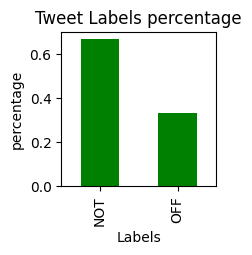

In [ ]:
traindata.label.value_counts(normalize=True).plot(kind='bar', color='green', figsize = (2,2))
plt.title('Tweet Labels percentage')
plt.xlabel('Labels'), plt.ylabel('percentage')

Histogram

<Axes: >

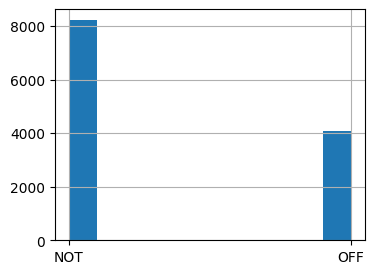

In [ ]:
traindata['label'].hist(figsize=(4,3))

Wordcloud

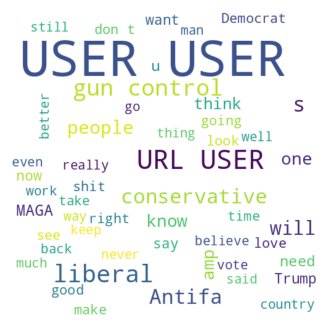

In [ ]:
from wordcloud import WordCloud
mywords = ' '.join([text for text in traindata['tweet'] ])
mywordcloud = WordCloud(width=500, height=500, max_font_size=80, max_words=50, background_color='white').generate(mywords)
plt.figure(figsize=(4, 4))
plt.imshow(mywordcloud, interpolation="hamming")
plt.axis('off')
plt.show()

Valid data.

In [ ]:
validdata = pd.read_csv(GDrivePath + '/valid.csv')
validdata.shape

(927, 3)

### Calculating the percentage of 'NOT' & 'OFF' valid data and showing graphical representation.

In [ ]:
validdata.label.value_counts(normalize=True)

NOT    0.667745
OFF    0.332255
Name: label, dtype: float64

(Text(0.5, 0, 'Labels'), Text(0, 0.5, 'percentage'))

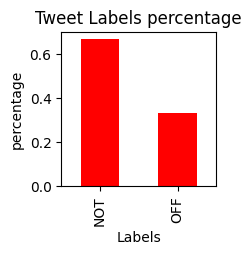

In [ ]:
validdata.label.value_counts(normalize=True).plot(kind='bar', color='red', figsize = (2,2))
plt.title('Tweet Labels percentage')
plt.xlabel('Labels'), plt.ylabel('percentage')

<Axes: >

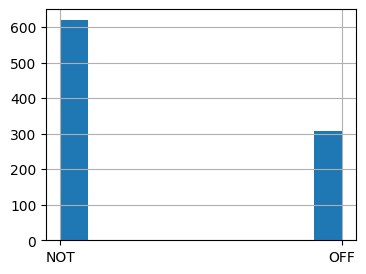

In [ ]:
validdata['label'].hist(figsize=(4,3))

Wordcloud

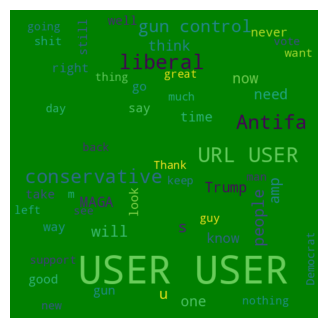

In [ ]:
from wordcloud import WordCloud
mywords = ' '.join([text for text in validdata['tweet'] ])
mywordcloud = WordCloud(width=500, height=500, random_state=Student_ID, max_words=50, background_color='green').generate(mywords)
plt.figure(figsize=(4, 4))
plt.imshow(mywordcloud, interpolation="hamming")
plt.axis('off')
plt.show()

Test Data.

In [ ]:
testdata = pd.read_csv(GDrivePath + '/test.csv')
testdata.shape

(860, 3)

### Calculating the percentage of 'NOT' & 'OFF' of test data and showing graphical representation.

In [ ]:
testdata.label.value_counts(normalize=True)

NOT    0.72093
OFF    0.27907
Name: label, dtype: float64

(Text(0.5, 0, 'Labels'), Text(0, 0.5, 'percentage'))

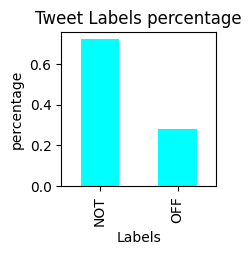

In [ ]:
testdata.label.value_counts(normalize=True).plot(kind='bar', color='cyan', figsize = (2,2))
plt.title('Tweet Labels percentage')
plt.xlabel('Labels'), plt.ylabel('percentage')

<Axes: >

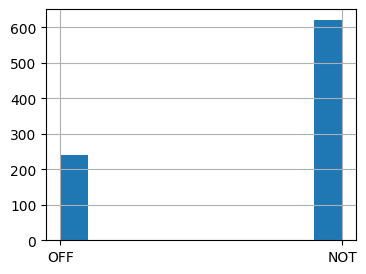

In [ ]:
testdata['label'].hist(figsize=(4,3))

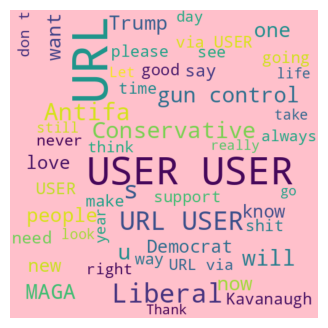

In [ ]:
from wordcloud import WordCloud
mywords = ' '.join([text for text in testdata['tweet'] ])
mywordcloud = WordCloud(width=500, height=500, random_state=15, max_font_size=80, max_words=50, background_color='pink').generate(mywords)
plt.figure(figsize=(4, 4))
plt.imshow(mywordcloud, interpolation="hamming")
plt.axis('off')
plt.show()

## Splitting the dataset into four parts( 25%, 50%, 75%, 100%)

In [ ]:
x = traindata[['id','tweet']]
y = traindata['label']

In [ ]:
def fileSpliter(a, b):
    X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.5, stratify=b)         # Divides the data into two equal parts(50%-50%)
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.5, stratify=y_train)   # Divide the first 50% into two equal parts(25%-25%)
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test)    # Divide the second 50% into two equal parts(25%-25%)
    # concatenate the four splits
    X_train = pd.concat([X_train1, X_train2])
    y_train = pd.concat([y_train1, y_train2])
    X_test = pd.concat([X_test1, X_test2])
    y_test = pd.concat([y_test1, y_test2])
    return X_train, X_test, y_train, y_test

In [ ]:
xtrain, xtest, ytrain, ytest = fileSpliter(x, y)
print('XTrain: ', xtrain)
print('YTrain: ', ytrain)
print('XTest: ', xtest)
print('YTest: ', ytest)

XTrain:            id                                              tweet
8101   67478  .@USER  @USER  MY CFB 10 #TBT at 9pm  and you ...
5229   87051  @USER @USER @USER @USER Don't feel sorry for h...
10947  83451                                  @USER Get out!!!!
12229  88984  @USER You are hands down the best principal ev...
4797   73255  #Florida what did we do??? This only adds to t...
...      ...                                                ...
12035  73270  @USER @USER @USER I wonder if she is still in ...
11879  96087  @USER @USER I warn you against asking for that...
10102  53270  @USER @USER stands with pedophiles not the sou...
5778   58600  @USER Shocking almost all liberals are crazy a...
4455   12482  @USER @USER No one is threatening her.  All a ...

[6156 rows x 2 columns]
YTrain:  8101     NOT
5229     OFF
10947    NOT
12229    NOT
4797     NOT
        ... 
12035    OFF
11879    NOT
10102    NOT
5778     OFF
4455     NOT
Name: label, Length: 6156, dtype: object
XTest

In [ ]:
xtrain1, xtest1, ytrain1, ytest1 = fileSpliter(xtrain, ytrain)
print('XTrain1: ', xtrain1)
print('YTrain1: ', ytrain1)
print('XTest1: ', xtest1)
print('YTest1: ', ytest1)

XTrain1:            id                                              tweet
8391   87274  @USER What is happening Layne? You are losing ...
5042   40866  @USER All you need to know about the importanc...
10354  15267  @USER Perhaps he believes as did the revolutio...
4106   25759  @USER Why add insult to injury? He is 100% dev...
8203   89484  @USER @USER @USER He's one of those types who ...
...      ...                                                ...
3966   45871  Antifa Caught Off Guard After Getting Confront...
1994   13533  @USER @USER @USER @USER @USER @USER @USER But ...
5460   53549                           @USER Oakland line sucks
9233   16321  @USER @USER @USER Yes.......that's why Aus. Co...
11716  84732                                @USER WHAT THW FUCK

[3078 rows x 2 columns]
YTrain1:  8391     NOT
5042     NOT
10354    NOT
4106     NOT
8203     NOT
        ... 
3966     NOT
1994     NOT
5460     OFF
9233     NOT
11716    OFF
Name: label, Length: 3078, dtype: object
XTe

In [ ]:
xtrain2, xtest2, ytrain2, ytest2 = fileSpliter(xtest, ytest)
print('XTrain2: ', xtrain2)
print('YTrain2: ', ytrain2)
print('XTest2: ', xtest2)
print('YTest2: ', ytest2)

XTrain2:            id                                              tweet
5314   11589  @USER @USER Landon sucks I asked him for my bi...
4319   44736  @USER Because they’re so hateful and can’t cov...
4828   38646  @USER Be still.  And know you are being prayed...
4264   12564                   @USER @USER she is a Private URL
5625   98605              @USER @USER He is a meme repeater URL
...      ...                                                ...
8059   31246  @USER @USER Big Wanda fucked with the wrong on...
11605  40674                                 @USER That sucks 👎
2777   24498  @USER @USER Elder and Owen have been the brave...
449    88245  @USER @USER Do any Dems/libs have a real job??...
5796   12890  @USER @USER &gt;&gt; old are you? [[She looks ...

[3078 rows x 2 columns]
YTrain2:  5314     OFF
4319     NOT
4828     NOT
4264     NOT
5625     OFF
        ... 
8059     NOT
11605    OFF
2777     OFF
449      NOT
5796     NOT
Name: label, Length: 3078, dtype: object
XTe

### Arranging the datasets into required conditions.

In [ ]:
xtrain1['label'] = ytrain1
train25_1 = xtrain1
xtest1['label'] = ytest1
train25_2 = xtest1
xtrain2['label'] = ytrain2
train25_3 = xtrain2
xtest2['label'] = ytest2
train25_4 = xtest2

In [ ]:
train25 = train25_1
train50 = pd.concat([train25_1, train25_2])
train75 = pd.concat([train25_1, train25_2, train25_3])
train100 = pd.concat([train25_1, train25_2, train25_3, train25_4])

### Creating a CSV file of all the splitted datasets.

In [ ]:
train25.to_csv(os.path.join(GDrivePath, 'train25.csv'))
train50.to_csv(os.path.join(GDrivePath, 'train50.csv'))
train75.to_csv(os.path.join(GDrivePath, 'train75.csv'))
train100.to_csv(os.path.join(GDrivePath, 'train100.csv'))

## Generating all the required functions for the code.

Function for cleaning the text.

In [ ]:
def textcleaner(tweet):
    tweet = tweet.lower()      # transfom text to lowercase
    tweet = re.sub(r'https?://\S+|www\.\S+|<.*?>|[^\w\s]', '', tweet)      # deleting URLs, HTML tags, punctuation, new lines, & alphanumeric characters
    tweet = re.sub(r'@user', '', tweet)        # deleting '@user'
    tweet = tweet.replace("'", "")             # deleting apostrophes
    tweet = emoji.demojize(tweet, delimiters=("", ""))    # changing emojis to words
    tweet = re.sub(r':[^\s]+:', '', tweet)       # deleting remaining colons & symbols from emojis
    words = [word for word in tweet.split() if word not in stopword]     # split tweet into words & deleting stop words
    tweet = ' '.join([mylemmatizer.lemmatize(word) for word in words])      # lemmatize words & join back into text
    return tweet

Function for calculating the 'Accuracy', 'F1 Score' and 'Confusion Matrix'.

In [ ]:
def performance_cal(y_true, y_pred, split='test'):
    print('Computing different preformance metrics on', split, 'set of Dataset')
    f1score=f1_score(y_true, y_pred, average='macro')
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print('F1 Score(macro): ', f1score)
    print('Accuracy: ', acc)
    print('Confusion matrix:\n', cm)
    sns.heatmap(cm, annot=True, cmap='BuGn', fmt='g')
    #plt.figure(figsize=(3,3))
    plt.xlabel('Predicted Labels')
    plt.ylabel('Original Labels')
    plt.title('Confusion Matrix')
    plt.show()

    return f1score

Pre-process the cleaned data.

In [ ]:
def prepare_dataset(data, count_vectorizer=None, split='test'):
  data['tweet'] = data['tweet'].apply(textcleaner)
  print('Tweet was cleaned.')
  if split == 'train':
      count_vectorizer = CountVectorizer(stop_words='english',max_features=5000)
      values = count_vectorizer.fit_transform(data['tweet'])
  else:
      values = count_vectorizer.transform(data['tweet'])

  if split == 'train':
      return values, count_vectorizer
  else:
      return values

Functions for training the  models.

In [ ]:
def model1_train(text_vector,label):

    print('Let\'s start training Random forest classifier')
    classifier = RandomForestClassifier()
    classifier.fit(text_vector, label)
    return classifier

In [ ]:
def model2_train(text_vector,label):

    print('Let\'s start training NuSVC classifier')
    hparameters = {'nu': [0.1, 0.3, 0.5], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}    # Giving hyperparameters to the model.
    svm_model = svm.NuSVC()
    myclassifier = GridSearchCV(svm_model, hparameters, cv=5)
    myclassifier.fit(text_vector, label)
    bestpara = myclassifier.best_params_
    mybestp = svm.NuSVC(**bestpara)
    mybestp.fit(text_vector, label)
    return mybestp

Function for saving the models into the directories.

In [ ]:
def model_saver(model, vectorizer, model_dir):
    # saving the model in the drive folder.
    model_file = os.path.join(model_dir, 'model.sav')
    pickle.dump(model, open(model_file, 'wb'))

    print('Saved model to ', model_file)

    vectorizer_file = os.path.join(model_dir, 'vectorizer.sav')
    pickle.dump(vectorizer, open(vectorizer_file, 'wb'))

    print('Saved Vectorizer to ', vectorizer_file)

    return model_file, vectorizer_file

Function for loading the models into the code from the respective directories.

In [ ]:
def model_loader(model_file, vectorizer_file):
    # load model and vectorizer from disk
    model = pickle.load(open(model_file, 'rb'))
    print('Loaded model from ', model_file)
    vectorizer = pickle.load(open(vectorizer_file, 'rb'))
    print('Loaded Vectorizer from ', vectorizer_file)
    return model, vectorizer

# Method 1

## Training code.
Train method for method 1.

In [ ]:
def train_method1(train_file, val_file, model_dir):
    train_df = pd.read_csv(train_file)
    val_df = pd.read_csv(val_file)
    train_label = train_df['label']
    val_label = val_df['label']
    train_values, count_vectorizer = prepare_dataset(train_df, split='train')
    val_values= prepare_dataset(val_df,count_vectorizer)
    model = model1_train(train_values,train_label)
    model_file, vectorizer_file = model_saver(model, count_vectorizer, model_dir)
    train_pred_label = model.predict(train_values)
    val_pred_label = model.predict(val_values)
    train_f1_score = performance_cal(train_label, train_pred_label, split='train')   # print('Train Split')
    val_f1_score = performance_cal(val_label, val_pred_label, split='valid')    # print('Validation Split')
    return model_file, vectorizer_file

### Calling training method function for all splitted datasets.

Train using of 25% of data
Tweet was cleaned.
Tweet was cleaned.
Let's start training Random forest classifier
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/25/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/25/vectorizer.sav
Computing different preformance metrics on train set of Dataset
F1 Score(macro):  0.9970644896713525
Accuracy:  0.9974009096816114
Confusion matrix:
 [[2056    0]
 [   8 1014]]


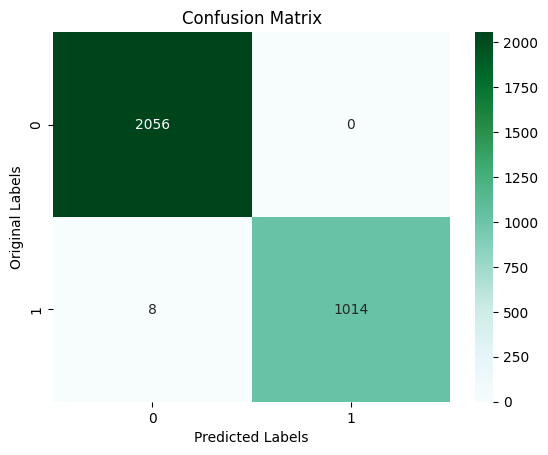

Computing different preformance metrics on valid set of Dataset
F1 Score(macro):  0.6676845864811398
Accuracy:  0.7378640776699029
Confusion matrix:
 [[555  64]
 [179 129]]


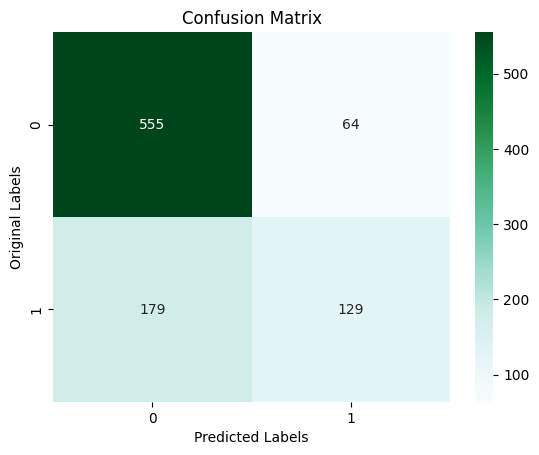

In [ ]:
print('Train using of 25% of data')
model_25_file, vectorizer_25_file = train_method1(train_25_file , validfile, Model_1_25_Directory)

Train using of 50% of data
Tweet was cleaned.
Tweet was cleaned.
Let's start training Random forest classifier
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/50/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/50/vectorizer.sav
Computing different preformance metrics on train set of Dataset
F1 Score(macro):  0.9948615797196239
Accuracy:  0.99545159194282
Confusion matrix:
 [[4107    3]
 [  25 2021]]


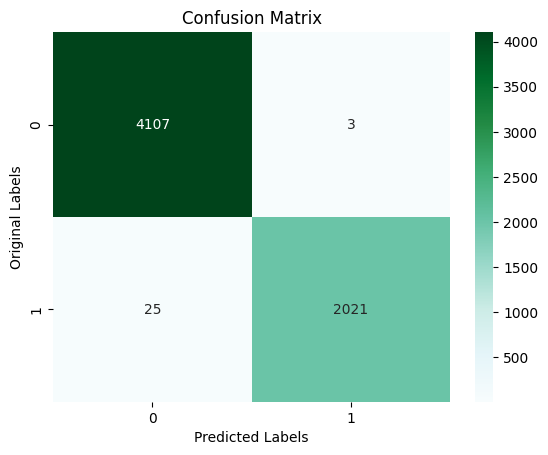

Computing different preformance metrics on valid set of Dataset
F1 Score(macro):  0.6936156394102747
Accuracy:  0.7529665587918015
Confusion matrix:
 [[553  66]
 [163 145]]


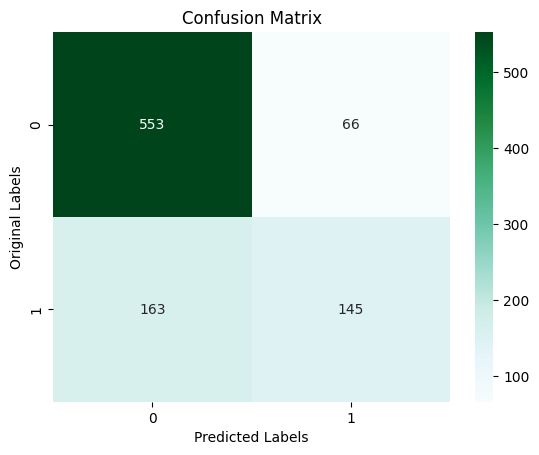

In [ ]:
print('Train using of 50% of data')
model_50_file, vectorizer_50_file = train_method1(train_50_file, validfile, Model_1_50_Directory)

Train using of 75% of data
Tweet was cleaned.
Tweet was cleaned.
Let's start training Random forest classifier
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/75/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/75/vectorizer.sav
Computing different preformance metrics on train set of Dataset
F1 Score(macro):  0.9933874180323151
Accuracy:  0.9941520467836257
Confusion matrix:
 [[6160    5]
 [  49 3020]]


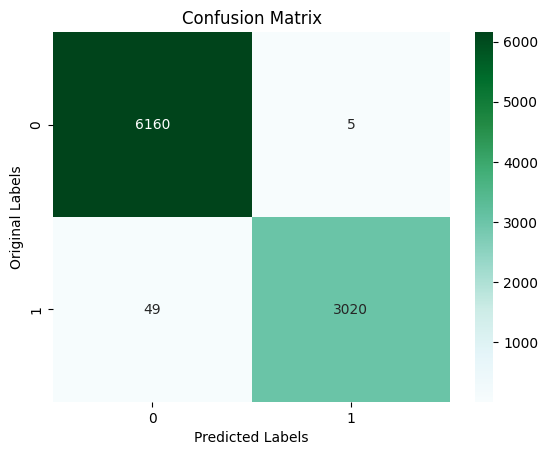

Computing different preformance metrics on valid set of Dataset
F1 Score(macro):  0.7067151783595665
Accuracy:  0.7583603020496225
Confusion matrix:
 [[546  73]
 [151 157]]


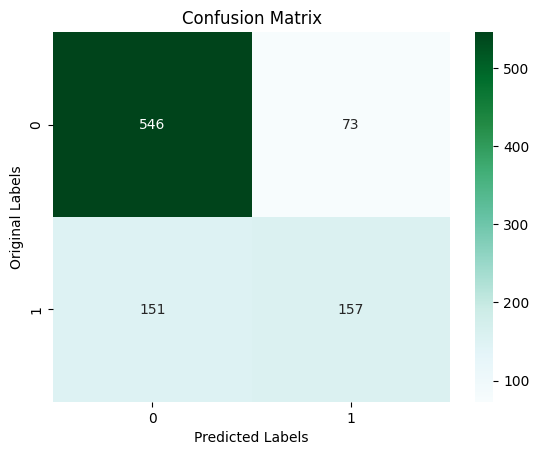

In [ ]:
print('Train using of 75% of data')
model_75_file, vectorizer_75_file = train_method1(train_75_file, validfile, Model_1_75_Directory)

Train using of 100% of data
Tweet was cleaned.
Tweet was cleaned.
Let's start training Random forest classifier
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/100/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/100/vectorizer.sav
Computing different preformance metrics on train set of Dataset
F1 Score(macro):  0.9930214936575467
Accuracy:  0.9938276618208398
Confusion matrix:
 [[8211   10]
 [  66 4026]]


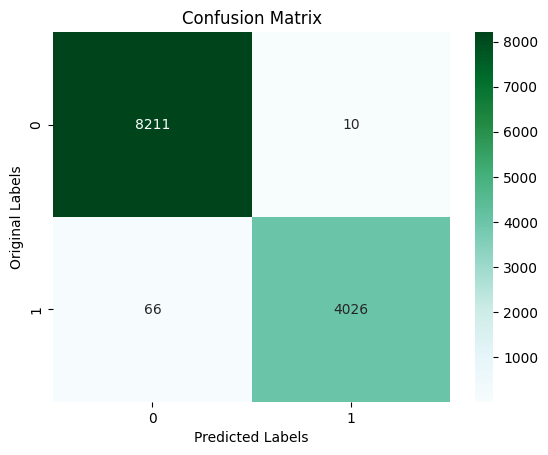

Computing different preformance metrics on valid set of Dataset
F1 Score(macro):  0.7281309550450135
Accuracy:  0.7723840345199569
Confusion matrix:
 [[545  74]
 [137 171]]


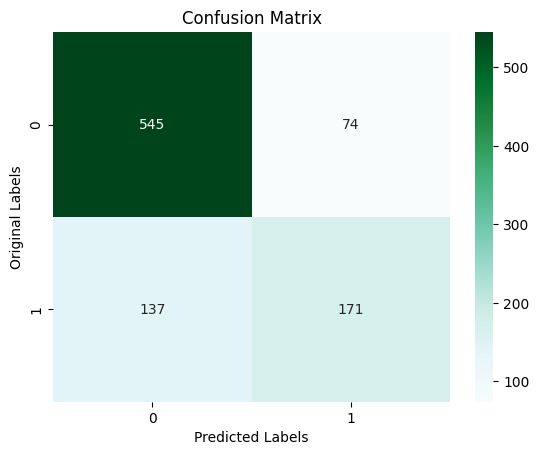

In [ ]:
print('Train using of 100% of data')
model_100_file, vectorizer_100_file = train_method1(train_100_file, validfile, Model_1_100_Directory)

Valid F1 Score of all splitted datasets.

In [ ]:
F1Score_Valid_1_25 = 0.6940521935924939
F1Score_Valid_1_50 = 0.7119524073174315
F1Score_Valid_1_75 = 0.7268326223619219
F1Score_Valid_1_100 = 0.7399972229936128

### Graphical representation valid F1 Score of all splitted datasets.

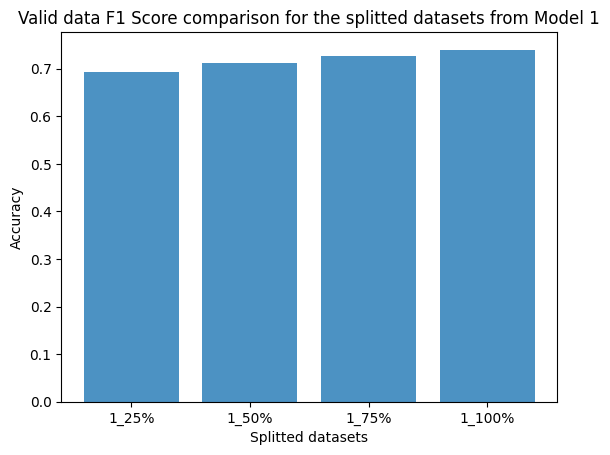

In [ ]:
objects1 = ('1_25%', '1_50%', '1_75%', '1_100%')
ypos = np.arange(len(objects1))
score = [F1Score_Valid_1_25, F1Score_Valid_1_50, F1Score_Valid_1_75, F1Score_Valid_1_100]
plt.bar(ypos, score, align='center', alpha=0.8)
plt.xticks(ypos, objects1)
plt.ylabel('Accuracy')
plt.xlabel('Splitted datasets')
plt.title('Valid data F1 Score comparison for the splitted datasets from Model 1')
plt.show()

## Testing code.
Test method for method 1. It takes the input from 'Train method 1'.

In [ ]:
def test_method1(test_file, model_file, vectorizer_file, output_dir):
    test_df = pd.read_csv(test_file)
    test_label = test_df['label']
    print(model_file)
    print(vectorizer_file)
    model, vectorizer = model_loader(model_file, vectorizer_file)
    test_values= prepare_dataset(test_df,vectorizer)
    test_pred_label = model.predict(test_values)
    test_df['out_label']  = test_pred_label
    test_f1_score = performance_cal(test_label, test_pred_label, split='test')
    out_file = os.path.join(output_dir, 'output_test.csv')
    print('Saving model output to', out_file)
    test_df.to_csv(out_file)

### Calling testing method function for all splitted datasets.

Testing using model trained on 25% data
gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/25/model.sav
gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/25/vectorizer.sav
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/25/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/25/vectorizer.sav
Tweet was cleaned.
Computing different preformance metrics on test set of Dataset
F1 Score(macro):  0.7027518659480043
Accuracy:  0.7965116279069767
Confusion matrix:
 [[584  36]
 [139 101]]


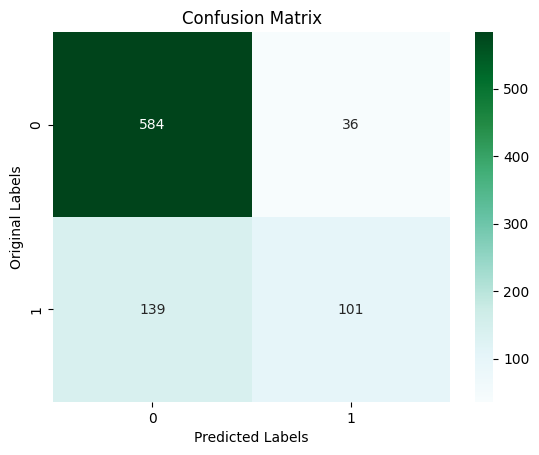

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/25/output_test.csv


In [ ]:
print('Testing using model trained on 25% data')
test_method1(testfile,  model_25_file,  vectorizer_25_file,  Model_1_25_Directory)

Testing using model trained on 50% data
gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/50/model.sav
gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/50/vectorizer.sav
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/50/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/50/vectorizer.sav
Tweet was cleaned.
Computing different preformance metrics on test set of Dataset
F1 Score(macro):  0.7238698774820449
Accuracy:  0.8011627906976744
Confusion matrix:
 [[572  48]
 [123 117]]


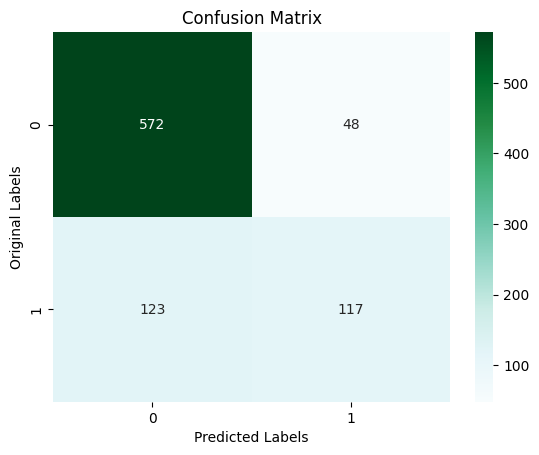

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/50/output_test.csv


In [ ]:
print('Testing using model trained on 50% data')
test_method1(testfile,  model_50_file,  vectorizer_50_file,  Model_1_50_Directory)

Testing using model trained on 75% data
gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/75/model.sav
gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/75/vectorizer.sav
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/75/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/75/vectorizer.sav
Tweet was cleaned.
Computing different preformance metrics on test set of Dataset
F1 Score(macro):  0.6960328126092394
Accuracy:  0.7883720930232558
Confusion matrix:
 [[576  44]
 [138 102]]


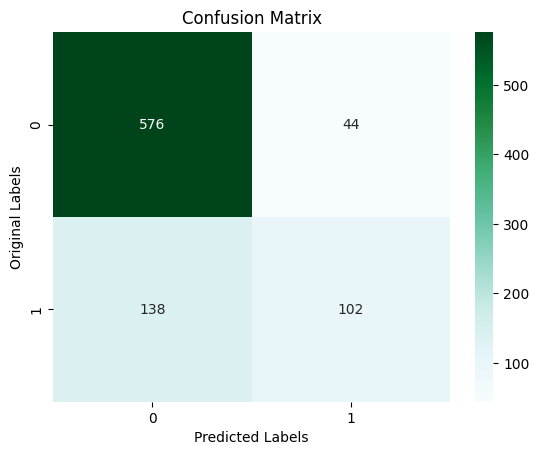

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/75/output_test.csv


In [ ]:
print('Testing using model trained on 75% data')
test_method1(testfile,  model_75_file,  vectorizer_75_file,  Model_1_75_Directory)

Testing using model trained on 100% data
gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/100/model.sav
gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/100/vectorizer.sav
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/100/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/100/vectorizer.sav
Tweet was cleaned.
Computing different preformance metrics on test set of Dataset
F1 Score(macro):  0.7026802044966867
Accuracy:  0.791860465116279
Confusion matrix:
 [[576  44]
 [135 105]]


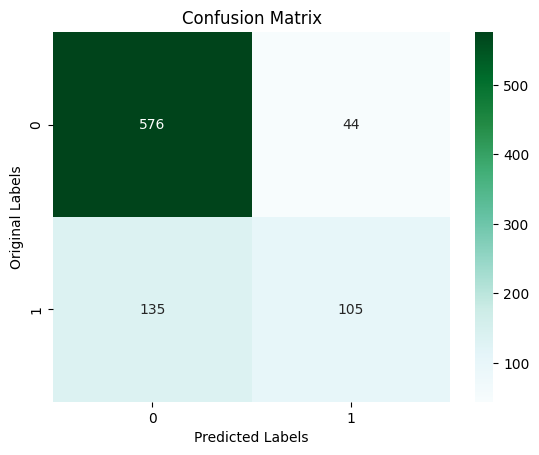

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2211688/models/1/100/output_test.csv


In [ ]:
print('Testing using model trained on 100% data')
test_method1(testfile,  model_100_file,  vectorizer_100_file,  Model_1_100_Directory)

Test F1 Score of all splitted datasets.

In [ ]:
F1Score_Test_1_25 = 0.7027518659480043
F1Score_Test_1_50 = 0.7252827401560265
F1Score_Test_1_75 = 0.7048192655571983
F1Score_Test_1_100 = 0.7175729848481417

### Graphical representation Test F1 Score of all splitted datasets.

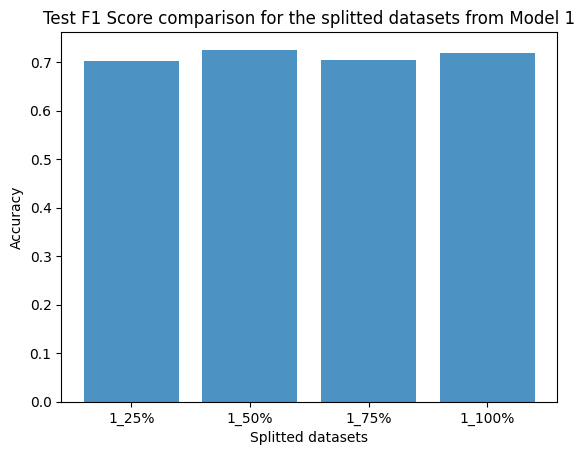

In [ ]:
objects1 = ('1_25%', '1_50%', '1_75%', '1_100%')
ypos = np.arange(len(objects1))
score = [F1Score_Test_1_25, F1Score_Test_1_50, F1Score_Test_1_75, F1Score_Test_1_100]
plt.bar(ypos, score, align='center', alpha=0.8)
plt.xticks(ypos, objects1)
plt.ylabel('Accuracy')
plt.xlabel('Splitted datasets')
plt.title('Test F1 Score comparison for the splitted datasets from Model 1')
plt.show()

## Method 1 end.

# Method 2

## Training code.
Train method for method 2.

In [ ]:
def train_method2(train_file, val_file, model_dir):
    train_df = pd.read_csv(train_file)
    val_df = pd.read_csv(val_file)
    train_label = train_df['label']
    val_label = val_df['label']
    train_values, count_vectorizer = prepare_dataset(train_df, split='train')
    val_values= prepare_dataset(val_df,count_vectorizer)
    model = model2_train(train_values,train_label)
    model_file, vectorizer_file = model_saver(model, count_vectorizer, model_dir)
    train_pred_label = model.predict(train_values)
    val_pred_label = model.predict(val_values)
    train_f1_score = performance_cal(train_label, train_pred_label, split='train')      # print('Train Split')
    val_f1_score = performance_cal(val_label, val_pred_label, split='valid')         # print('Validation Split')
    return model_file, vectorizer_file

### Calling training method function for all splitted datasets.

Train using of 25% of data
Tweet was cleaned.
Tweet was cleaned.
Let's start training NuSVC classifier
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/25/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/25/vectorizer.sav
Computing different preformance metrics on train set of Dataset
F1 Score(macro):  0.8505534858708437
Accuracy:  0.8801169590643275
Confusion matrix:
 [[2039   17]
 [ 352  670]]


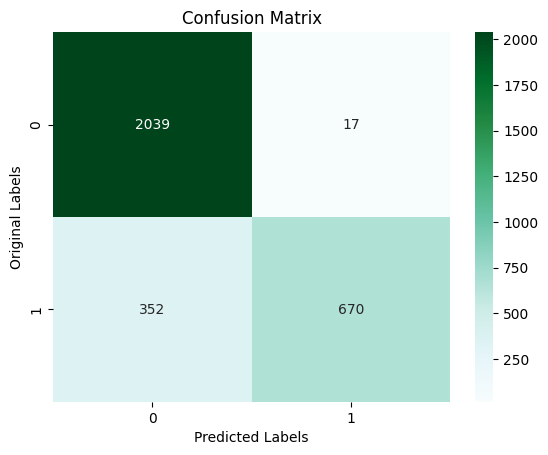

Computing different preformance metrics on valid set of Dataset
F1 Score(macro):  0.6467230973619282
Accuracy:  0.7292340884573895
Confusion matrix:
 [[562  57]
 [194 114]]


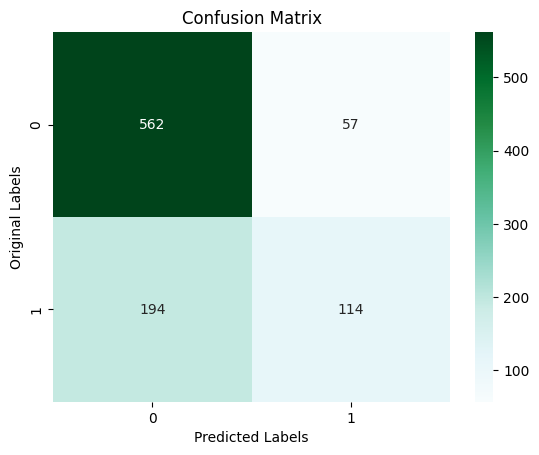

In [ ]:
print('Train using of 25% of data')
model_2_25_file, vectorizer_2_25_file = train_method2(train_25_file, validfile, Model_2_25_Directory)

Train using of 50% of data
Tweet was cleaned.
Tweet was cleaned.
Let's start training NuSVC classifier
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/50/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/50/vectorizer.sav
Computing different preformance metrics on train set of Dataset
F1 Score(macro):  0.8584510136351111
Accuracy:  0.8856400259909032
Confusion matrix:
 [[4075   35]
 [ 669 1377]]


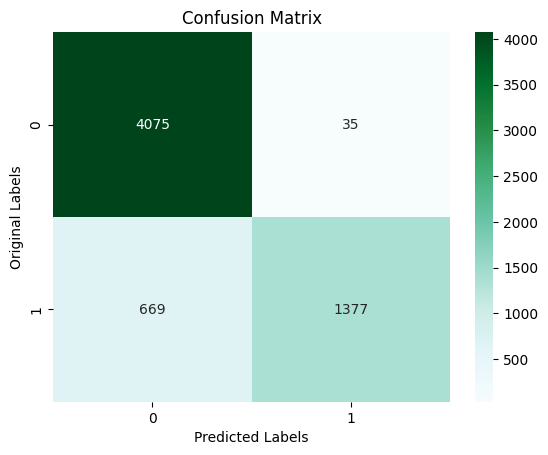

Computing different preformance metrics on valid set of Dataset
F1 Score(macro):  0.6636721657157034
Accuracy:  0.7475728155339806
Confusion matrix:
 [[578  41]
 [193 115]]


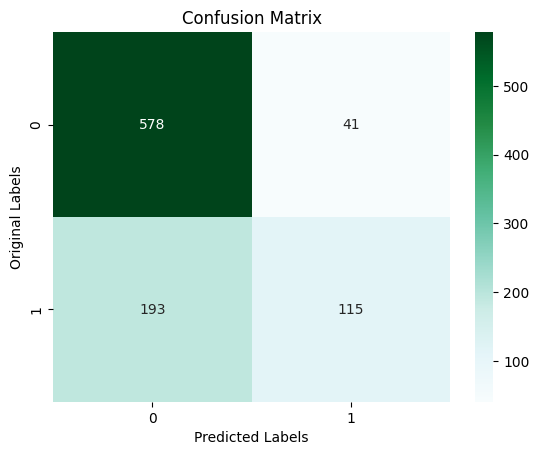

In [ ]:
print('Train using of 50% of data')
model_2_50_file, vectorizer_2_50_file = train_method2(train_50_file, validfile, Model_2_50_Directory)

Train using of 75% of data
Tweet was cleaned.
Tweet was cleaned.
Let's start training NuSVC classifier
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/75/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/75/vectorizer.sav
Computing different preformance metrics on train set of Dataset
F1 Score(macro):  0.8441482480448845
Accuracy:  0.8749187784275504
Confusion matrix:
 [[6091   74]
 [1081 1988]]


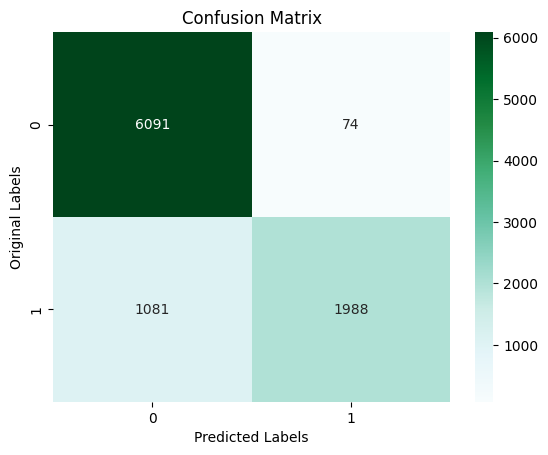

Computing different preformance metrics on valid set of Dataset
F1 Score(macro):  0.6841749026745385
Accuracy:  0.7572815533980582
Confusion matrix:
 [[574  45]
 [180 128]]


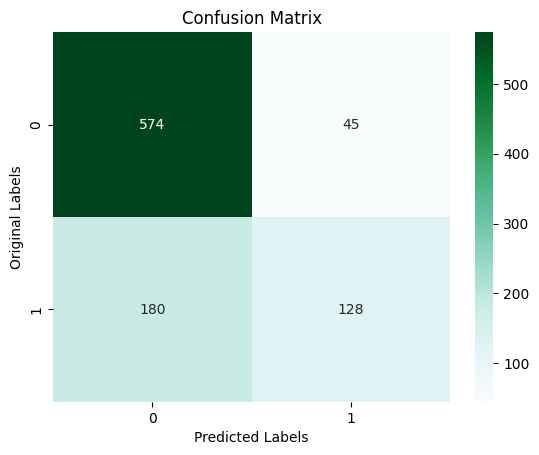

In [ ]:
print('Train using of 75% of data')
model_2_75_file, vectorizer_2_75_file = train_method2(train_75_file, validfile, Model_2_75_Directory)

Train using of 100% of data
Tweet was cleaned.
Tweet was cleaned.
Let's start training NuSVC classifier
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/100/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/100/vectorizer.sav
Computing different preformance metrics on train set of Dataset
F1 Score(macro):  0.7875319856554157
Accuracy:  0.8326971493543409
Confusion matrix:
 [[7965  256]
 [1804 2288]]


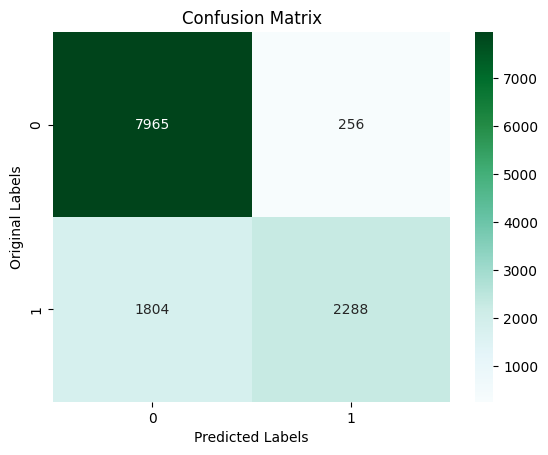

Computing different preformance metrics on valid set of Dataset
F1 Score(macro):  0.7002645502645503
Accuracy:  0.7626752966558792
Confusion matrix:
 [[565  54]
 [166 142]]


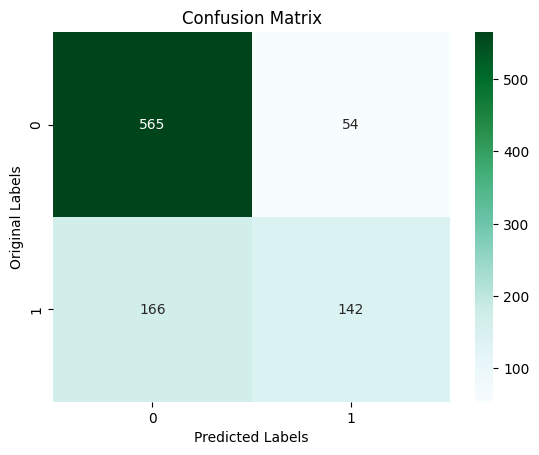

In [ ]:
print('Train using of 100% of data')
model_2_100_file, vectorizer_2_100_file = train_method2(train_100_file, validfile, Model_2_100_Directory)

In [ ]:
F1Score_Valid_2_25 = 0.6662175503803938
F1Score_Valid_2_50 = 0.6728630029559027
F1Score_Valid_2_75 = 0.7002645502645503
F1Score_Valid_2_100 = 0.7002645502645503

### Graphical representation valid F1 Score of all splitted datasets.

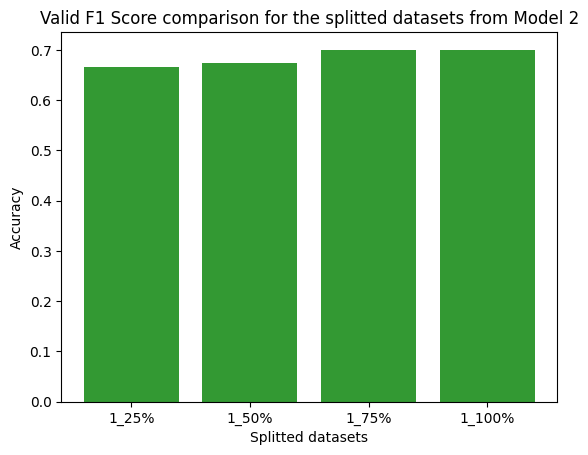

In [ ]:
objects1 = ('1_25%', '1_50%', '1_75%', '1_100%')
ypos = np.arange(len(objects1))
score = [F1Score_Valid_2_25, F1Score_Valid_2_50, F1Score_Valid_2_75, F1Score_Valid_2_100]
plt.bar(ypos, score, align='center', alpha=0.8, color = 'Green')
plt.xticks(ypos, objects1)
plt.ylabel('Accuracy')
plt.xlabel('Splitted datasets')
plt.title('Valid F1 Score comparison for the splitted datasets from Model 2')
plt.show()

## Testing code.
Test method for method 2. It takes the input from 'Train method 2'.

In [ ]:
def test_method2(test_file, model_file, vectorizer_file, output_dir):
    test_df = pd.read_csv(test_file)
    test_label = test_df['label']
    print(model_file)
    print(vectorizer_file)
    model, vectorizer = model_loader(model_file, vectorizer_file)
    test_values= prepare_dataset(test_df,vectorizer)
    test_pred_label = model.predict(test_values)
    test_df['out_label']  = test_pred_label # Note how this is saved
    test_f1_score = performance_cal(test_label, test_pred_label, split='test')
    out_file = os.path.join(output_dir, 'output_test.csv')
    print('Saving model output to', out_file)
    test_df.to_csv(out_file)

### Calling training method function for all splitted datasets.

Testing using model trained on 25% data
gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/25/model.sav
gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/25/vectorizer.sav
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/25/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/25/vectorizer.sav
Tweet was cleaned.
Computing different preformance metrics on test set of Dataset
F1 Score(macro):  0.6513223552894212
Accuracy:  0.7581395348837209
Confusion matrix:
 [[564  56]
 [152  88]]


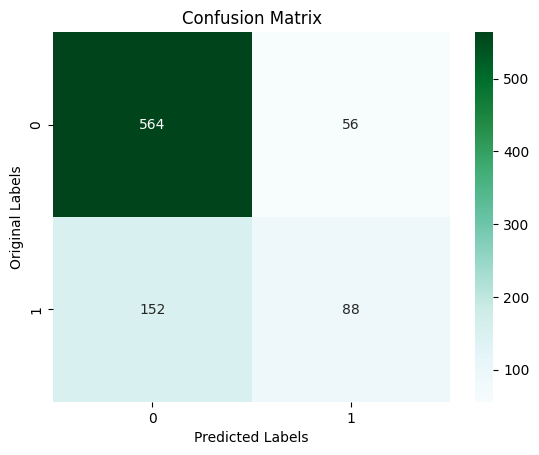

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/25/output_test.csv


In [ ]:
print('Testing using model trained on 25% data')
test_method2(testfile,  model_2_25_file,  vectorizer_2_25_file,  Model_2_25_Directory)

Testing using model trained on 50% data
gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/50/model.sav
gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/50/vectorizer.sav
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/50/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/50/vectorizer.sav
Tweet was cleaned.
Computing different preformance metrics on test set of Dataset
F1 Score(macro):  0.6817873932163979
Accuracy:  0.7872093023255814
Confusion matrix:
 [[586  34]
 [149  91]]


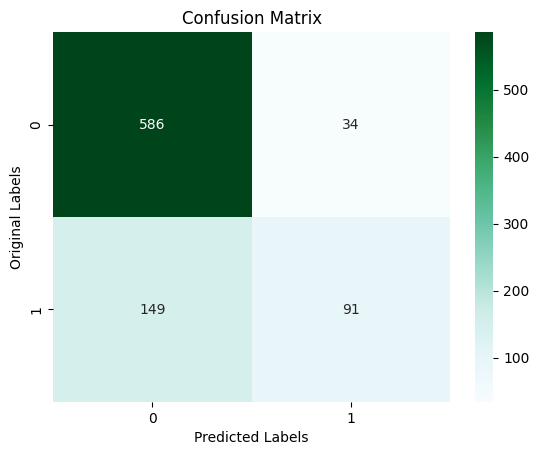

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/50/output_test.csv


In [ ]:
print('Testing using model trained on 50% data')
test_method2(testfile,  model_2_50_file,  vectorizer_2_50_file,  Model_2_50_Directory)

Testing using model trained on 75% data
gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/75/model.sav
gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/75/vectorizer.sav
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/75/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/75/vectorizer.sav
Tweet was cleaned.
Computing different preformance metrics on test set of Dataset
F1 Score(macro):  0.7038370680957244
Accuracy:  0.8011627906976744
Confusion matrix:
 [[591  29]
 [142  98]]


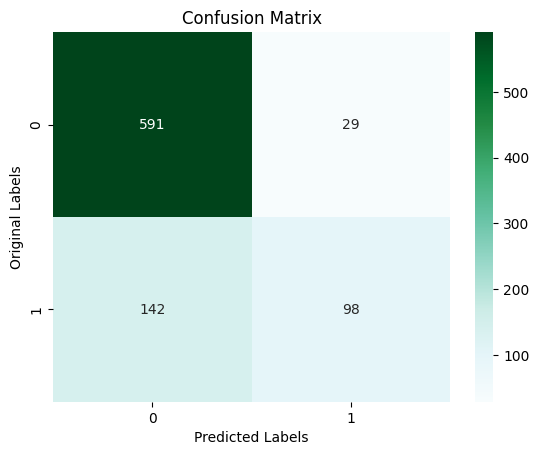

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/75/output_test.csv


In [ ]:
print('Testing using model trained on 75% data')
test_method2(testfile,  model_2_75_file,  vectorizer_2_75_file,  Model_2_75_Directory)

Testing using model trained on 100% data
gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/100/model.sav
gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/100/vectorizer.sav
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/100/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/100/vectorizer.sav
Tweet was cleaned.
Computing different preformance metrics on test set of Dataset
F1 Score(macro):  0.7084312267657993
Accuracy:  0.8011627906976744
Confusion matrix:
 [[587  33]
 [138 102]]


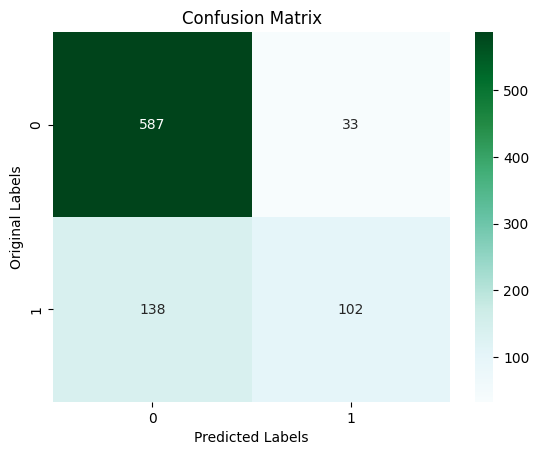

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2211688/models/2/100/output_test.csv


In [ ]:
print('Testing using model trained on 100% data')
test_method2(testfile,  model_2_100_file,  vectorizer_2_100_file,  Model_2_100_Directory)

F1 Score of all splitted datasets.

In [ ]:
F1Score_Test_2_25 = 0.6888539291056395
F1Score_Test_2_50 = 0.7037991507018055
F1Score_Test_2_75 = 0.697133331768131
F1Score_Test_2_100 = 0.7096092604761665

### Graphical representation Test F1 Score of all splitted datasets.

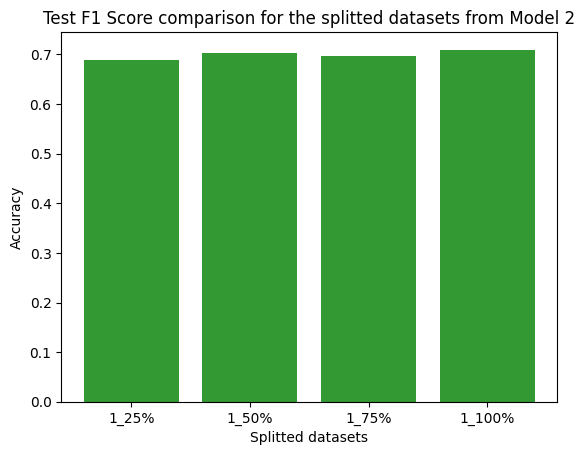

In [ ]:
objects1 = ('1_25%', '1_50%', '1_75%', '1_100%')
ypos = np.arange(len(objects1))
score = [F1Score_Test_2_25, F1Score_Test_2_50, F1Score_Test_2_75, F1Score_Test_2_100]
plt.bar(ypos, score, align='center', alpha=0.8, color = 'Green')
plt.xticks(ypos, objects1)
plt.ylabel('Accuracy')
plt.xlabel('Splitted datasets')
plt.title('Test F1 Score comparison for the splitted datasets from Model 2')
plt.show()

## Method 2 end.

# Comparison of F1 Score of both Models using BarPlot.

Valid F1 Score of both models.

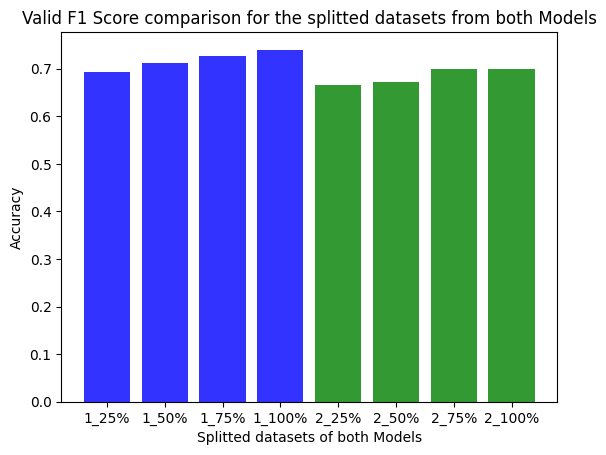

In [ ]:
objects3 = ('1_25%', '1_50%', '1_75%', '1_100%', '2_25%', '2_50%', '2_75%', '2_100%')
ypos = np.arange(len(objects3))
score = [F1Score_Valid_1_25, F1Score_Valid_1_50, F1Score_Valid_1_75, F1Score_Valid_1_100, F1Score_Valid_2_25, F1Score_Valid_2_50, F1Score_Valid_2_75, F1Score_Valid_2_100]
plt.bar(ypos, score, align='center', alpha=0.8, color = ['blue','blue','blue','blue','green','green','green','green'])
plt.xticks(ypos, objects3)
plt.ylabel('Accuracy')
plt.xlabel('Splitted datasets of both Models')
plt.title('Valid F1 Score comparison for the splitted datasets from both Models')
plt.show()

Test F1 Score of both models.

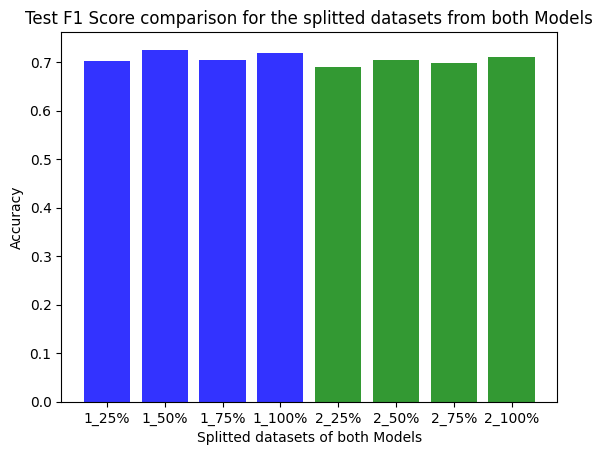

In [ ]:
objects3 = ('1_25%', '1_50%', '1_75%', '1_100%', '2_25%', '2_50%', '2_75%', '2_100%')
ypos = np.arange(len(objects3))
score = [F1Score_Test_1_25, F1Score_Test_1_50, F1Score_Test_1_75, F1Score_Test_1_100, F1Score_Test_2_25, F1Score_Test_2_50, F1Score_Test_2_75, F1Score_Test_2_100]
plt.bar(ypos, score, align='center', alpha=0.8, color = ['blue','blue','blue','blue','green','green','green','green'])
plt.xticks(ypos, objects3)
plt.ylabel('Accuracy')
plt.xlabel('Splitted datasets of both Models')
plt.title('Test F1 Score comparison for the splitted datasets from both Models')
plt.show()

# End.